In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryan2000999","key":"543fdbf87e89d1f1cff0d36584e2cc89"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           8800        285  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7152        169  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2150         72  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 91.4MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip spaceship-titanic.zip -d train

Archive:  spaceship-titanic.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
import pandas as pd
data = pd.read_csv('/content/train/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
test = pd.read_csv('/content/train/test.csv')

#Exploring Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# we have 6 numeric features and 5 categorical features(and aslo PassengerId, Name, and our target Transported).

In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# except age all other columns have median = 0 and very high max values which makes those columns very much right skewd with outliers

In [ ]:
data.groupby('Transported')['PassengerId'].count()

Transported
False    4315
True     4378
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

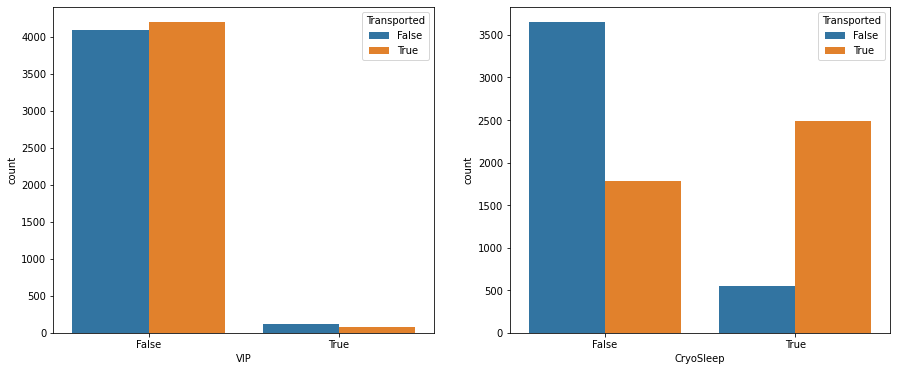

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2,figsize=(15, 6))



sns.countplot(data=data, x="VIP", hue="Transported",ax=axs[0])
sns.countplot(data=data, x="CryoSleep", hue="Transported",ax=axs[1])


# cryosleep passengers could be transported but many VIP passengers were not transported

# Lets explore "Cabin" feature

In [ ]:
data.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
df=pd.DataFrame()
df[['Cabin_deck','Cabin_num','Cabin_side']]=data.dropna().Cabin.str.split('/',expand=True)
df=df.astype({'Cabin_num':'int'})

In [ ]:
print(df['Cabin_deck'].value_counts())
print(df['Cabin_side'].value_counts())

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Cabin_deck, dtype: int64
S    3345
P    3261
Name: Cabin_side, dtype: int64


<AxesSubplot:xlabel='Transported', ylabel='Age'>

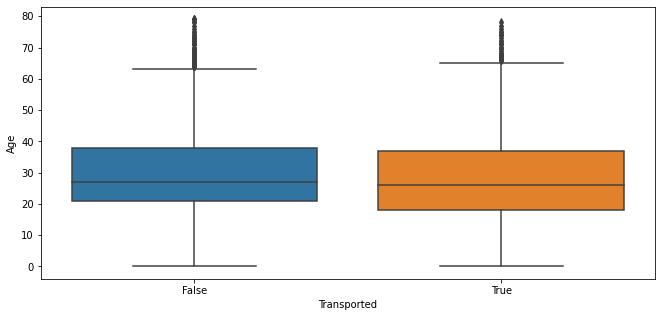

In [ ]:
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x='Transported', y="Age",  data=data)

# there are outliers in the age column
# transported is same for people between age 20 to 40

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transported')

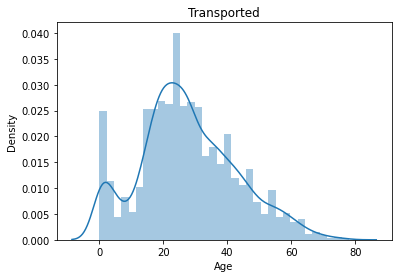

In [ ]:
transported = data.loc[data['Transported']==1,"Age"].dropna()
sns.distplot(transported)
plt.title("Transported")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Not Transported')

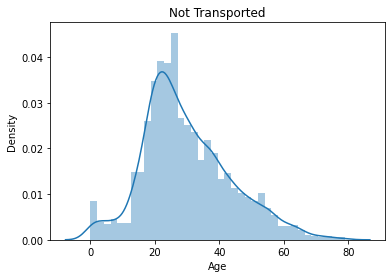

In [ ]:
not_transported = data.loc[data['Transported']==0,"Age"].dropna()
sns.distplot(not_transported)
plt.title("Not Transported")

# analysis of HomePlanet

In [ ]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


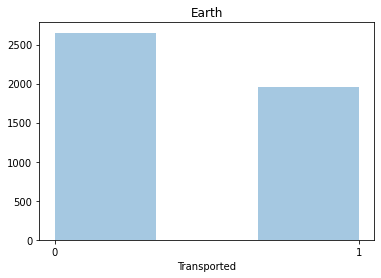

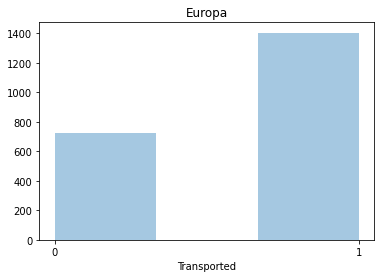

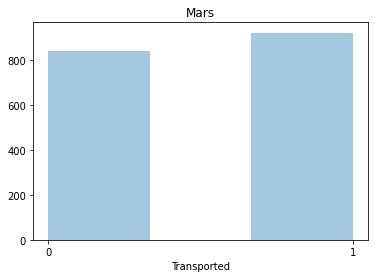

In [ ]:
sns.distplot(a=data[data['HomePlanet']=='Earth']['Transported'],bins=3,kde=False)
plt.title("Earth")
plt.xticks([0,1])
plt.show()
plt.title("Europa")
sns.distplot(a=data[data['HomePlanet']=='Europa']['Transported'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()
plt.title("Mars")
sns.distplot(a=data[data['HomePlanet']=='Mars']['Transported'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()

# many passengers from Earth didnot get transported

In [ ]:
data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

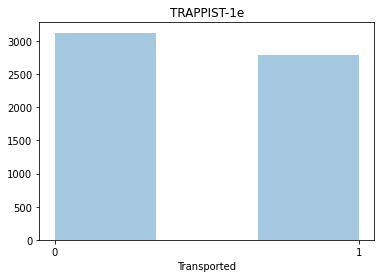

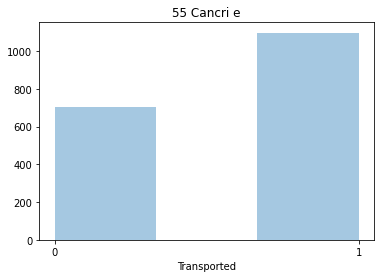

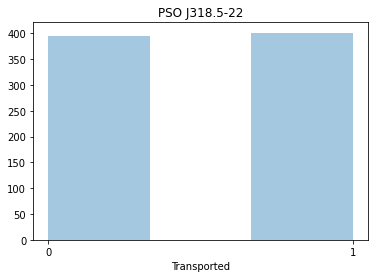

In [ ]:
sns.distplot(a=data[data['Destination']=='TRAPPIST-1e']['Transported'],bins=3,kde=False)
plt.title("TRAPPIST-1e")
plt.xticks([0,1])
plt.show()
plt.title("55 Cancri e")
sns.distplot(a=data[data['Destination']=='55 Cancri e']['Transported'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()
plt.title("PSO J318.5-22")
sns.distplot(a=data[data['Destination']=='PSO J318.5-22']['Transported'],bins=3,kde=False)
plt.xticks([0,1])

plt.show()

# Missing values treatment

In [ ]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

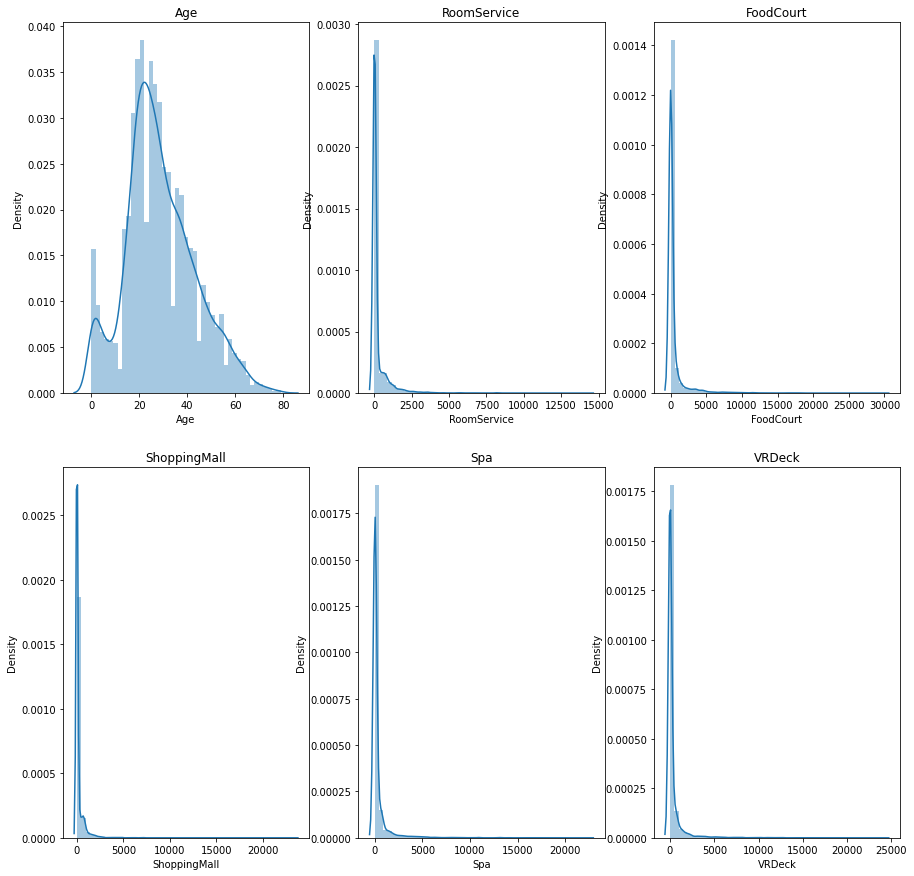

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)


for ax, col in zip(axes, data.describe().columns):
  sns.distplot(data[col], ax = ax)
  ax.set_title(col)

In [ ]:
data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
data['VIP']=data['VIP'].fillna(False)
data['Age']=data['Age'].fillna(data['Age'].median())
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['Cabin'] =data['Cabin'].fillna('T/0/S')
data['CryoSleep']=data['CryoSleep'].fillna(False)
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data.set_index('PassengerId',inplace=True)

test
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test['VIP']=test['VIP'].fillna(False)
test['Age']=test['Age'].fillna(test['Age'].median())
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['Cabin'] =test['Cabin'].fillna('T/0/S')
test['CryoSleep']=test['CryoSleep'].fillna(False)
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test.set_index('PassengerId',inplace=True)

#Feature engineering

In [ ]:
data[['Cabin_deck','Cabin_num','Cabin_side']]=data.Cabin.str.split('/',expand=True)
data['Total_spend']=data['RoomService']+data['FoodCourt']+data['ShoppingMall']+data['Spa']+data['VRDeck']

In [ ]:
data=data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin','Name'],axis=1)

In [ ]:
test[['Cabin_deck','Cabin_num','Cabin_side']]=test.Cabin.str.split('/',expand=True)
test['Total_spend']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [ ]:
test=test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin','Name'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

data[['CryoSleep','VIP','Transported','Cabin_side']]=data[['CryoSleep','VIP','Transported','Cabin_side']].apply(LabelEncoder().fit_transform)
OHE=pd.get_dummies(data[['HomePlanet','Destination','Cabin_deck']])
data_y=data['Transported']
data=pd.concat([data, OHE], axis=1).drop(['HomePlanet','Destination','Cabin_deck','Transported'],axis=1)
data=data.astype({'Cabin_num':'int'})

# ----------------------------------------------------------------------------


test[['CryoSleep','VIP','Cabin_side']]=test[['CryoSleep','VIP','Cabin_side']].apply(LabelEncoder().fit_transform)
OHE=pd.get_dummies(test[['HomePlanet','Destination','Cabin_deck']])
test=pd.concat([test, OHE], axis=1).drop(['HomePlanet','Destination','Cabin_deck'],axis=1)
test=test.astype({'Cabin_num':'int'})

#Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, data_y, test_size=0.2,random_state=13)

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None, predictions=False)

models, predictions = clf.fit(X_train, X_val, y_train, y_val)
models

100%|██████████| 29/29 [00:41<00:00,  1.45s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.76,0.76,0.76,0.76,0.23
XGBClassifier,0.75,0.75,0.75,0.75,1.02
SVC,0.75,0.75,0.75,0.74,3.76
NuSVC,0.74,0.74,0.74,0.74,6.99
RandomForestClassifier,0.74,0.74,0.74,0.74,1.12
BaggingClassifier,0.74,0.73,0.73,0.73,0.38
LinearDiscriminantAnalysis,0.73,0.73,0.73,0.73,0.31
RidgeClassifierCV,0.73,0.73,0.73,0.73,0.08
RidgeClassifier,0.73,0.73,0.73,0.73,0.04


# Hyperparameter tuning of LGBM

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
lgb_params = {
    
    'n_estimators' :[50,100,125],
    'learning_rate' : [0.03,0.05,0.08],
     'max_depth' : [4,5,6]
}
gbc_cv_model = GridSearchCV(LGBMClassifier(objective='binary'), lgb_params, cv = 5, n_jobs = -1)
gbc_cv_model.fit(X_train, y_train)
print("Best hyperparametres of the model: \n", gbc_cv_model.best_params_)

Best hyperparametres of the model: 
 {'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
LGBM=LGBMClassifier(objective='binary',learning_rate= 0.05, max_depth=5, n_estimators=100)
LGBM.fit(X_train, y_train)
y_pred=LGBM.predict(X_val)
accuracy_score(y_val, y_pred)

0.7642323174238068

# RESULTS ON TEST DATA

In [ ]:
test['Transported']=LGBM.predict(test)

In [ ]:
test.reset_index(inplace = True)

In [ ]:
final_df = test[['PassengerId','Transported']]

In [ ]:
final_df.to_csv("Titanic Spaceship competition Submission.csv")

# Reflections

In the space ship Titanic task, we were supposed to predict the passengers who got successfully transported to an alternate dimension.

It was observed that, a lot of cryosleep passengers were transported on the other hand VIP passengers were not transported.

Majority of the people on spaceship were in the age between 20 – 40 yrs. Age column had outliers.

It was observed that many passengers from Home Planet – Earth did not get transported.

The destination for almost 6000 passengers was TRAPPIST-1e,Almost 3000 passengers amongst them couldnot be transported.

The cabin column was cleaned by dividing in to three parts, cabin_deck, cabin_num, cabin_side.

Majority of the data in 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' was 0 and the v missing values in these columns were further filled by zero

Age column missing values were filled by median

The categorical columns were filled by mode

Spendings in 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'was added to create a single feature as total spend.

Variety of models were checked using lazy classifier.

Light Gradient boost was observed to be performing the best. This model was also then used to predict test data.
